# Baseline

This notebook implements classical computer vision baselines using ORB and SIFT, which serve as reference points for evaluating future neural-based methods. These techniques are used to match locations across images taken from varying viewpoints.

## Imports

In [1]:
from utils.baseline import *

## Data

Due to the computational cost of exhaustive pairwise matching across all images and views, the dataset is shuffled and reduced in size. This allows faster experimentation while preserving a representative sample for baseline evaluation.

In [2]:
random.seed(42)
np.random.seed(42)
cv2.setRNGSeed(42)
os.environ["PYTHONHASHSEED"] = "42"

In [3]:
data_df = pd.read_csv("data/nearest_places_mapping.csv")
data_df = data_df.sample(frac=1).reset_index(drop=True)
data_df = data_df.head(50)

## ORB

This section explores an ORB-based image matching pipeline. Since each location is captured from multiple viewpoints, we begin by evaluating performance on single views independently. To better utilize the multi-view data, we implement two aggregation strategies:
 - A voting scheme, where each view contributes equally to the final decision.
 - A weighted scheme, where matches from each view are weighted by the number of keypoint matches found, giving more influence to stronger matches.

### Running the experiments

In [4]:
ORB_baseline_results = get_baseline(data_df, "ORB", nfeatures=500, ratio_thresh=0.75)

Processing View: 0


100%|██████████| 50/50 [00:26<00:00,  1.90it/s]


Processing View: 1


100%|██████████| 50/50 [00:27<00:00,  1.79it/s]


Processing View: 2


100%|██████████| 50/50 [00:29<00:00,  1.68it/s]


Processing View: 3


100%|██████████| 50/50 [00:28<00:00,  1.76it/s]


Processing View: 4


100%|██████████| 50/50 [00:30<00:00,  1.62it/s]


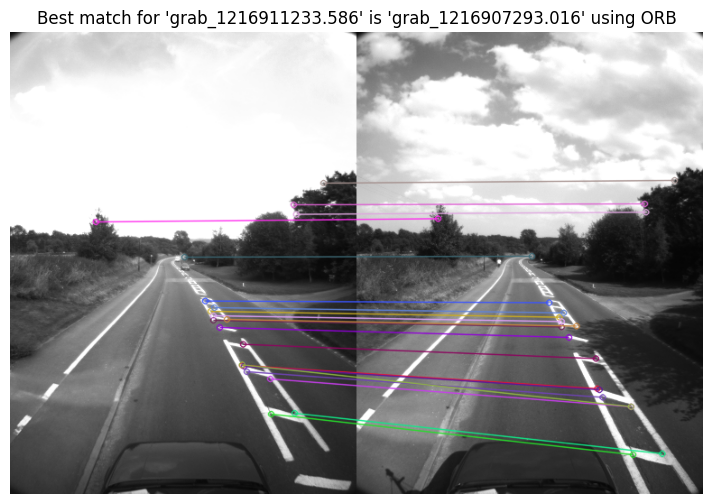

In [5]:
visualize_top_match(data_df, ORB_baseline_results, index=0, view=0, method="ORB", nfeatures=500, ratio_thresh=0.75)

### Single Views

In [6]:
view = 0
orb_acc_0, orb_top5_0 = evaluate_accuracy_single_view(data_df, ORB_baseline_results, view=view, top_k=5)
orb_acc_0, orb_top10_0 = evaluate_accuracy_single_view(data_df, ORB_baseline_results, view=view, top_k=10)
print(f"View {view}: Top-1 Accuracy: {orb_acc_0:.3f}, Top-5 Accuracy: {orb_top5_0:.3f}, Top-10 Accuracy: {orb_top10_0:.3f}")

View 0: Top-1 Accuracy: 0.880, Top-5 Accuracy: 0.880, Top-10 Accuracy: 0.900


In [7]:
view = 1
orb_acc_1, orb_top5_1 = evaluate_accuracy_single_view(data_df, ORB_baseline_results, view=view, top_k=5)
orb_acc_1, orb_top10_1 = evaluate_accuracy_single_view(data_df, ORB_baseline_results, view=view, top_k=10)
print(f"View {view}: Top-1 Accuracy: {orb_acc_1:.3f}, Top-5 Accuracy: {orb_top5_1:.3f}, Top-10 Accuracy: {orb_top10_1:.3f}")

View 1: Top-1 Accuracy: 0.720, Top-5 Accuracy: 0.780, Top-10 Accuracy: 0.840


In [8]:
view = 2
orb_acc_2, orb_top5_2 = evaluate_accuracy_single_view(data_df, ORB_baseline_results, view=view, top_k=5)
orb_acc_2, orb_top10_2 = evaluate_accuracy_single_view(data_df, ORB_baseline_results, view=view, top_k=10)
print(f"View {view}: Top-1 Accuracy: {orb_acc_2:.3f}, Top-5 Accuracy: {orb_top5_2:.3f}, Top-10 Accuracy: {orb_top10_2:.3f}")

View 2: Top-1 Accuracy: 0.860, Top-5 Accuracy: 0.920, Top-10 Accuracy: 0.920


In [9]:
view = 3
orb_acc_3, orb_top5_3 = evaluate_accuracy_single_view(data_df, ORB_baseline_results, view=view, top_k=5)
orb_acc_3, orb_top10_3 = evaluate_accuracy_single_view(data_df, ORB_baseline_results, view=view, top_k=10)
print(f"View {view}: Top-1 Accuracy: {orb_acc_3:.3f}, Top-5 Accuracy: {orb_top5_3:.3f}, Top-10 Accuracy: {orb_top10_3:.3f}")

View 3: Top-1 Accuracy: 0.740, Top-5 Accuracy: 0.800, Top-10 Accuracy: 0.860


In [10]:
view = 4
orb_acc_4, orb_top5_4 = evaluate_accuracy_single_view(data_df, ORB_baseline_results, view=view, top_k=5)
orb_acc_4, orb_top10_4 = evaluate_accuracy_single_view(data_df, ORB_baseline_results, view=view, top_k=10)
print(f"View {view}: Top-1 Accuracy: {orb_acc_4:.3f}, Top-5 Accuracy: {orb_top5_4:.3f}, Top-10 Accuracy: {orb_top10_4:.3f}")

View 4: Top-1 Accuracy: 0.600, Top-5 Accuracy: 0.740, Top-10 Accuracy: 0.800


### Mean View Aggregation

In [11]:
orb_acc_mean, orb_top5_mean = evaluate_accuracy_freq_aggregation(data_df, ORB_baseline_results, top_k=5)
orb_acc_mean, orb_top10_mean = evaluate_accuracy_freq_aggregation(data_df, ORB_baseline_results, top_k=10)
print(f"Mean Aggregation: Top-1 Accuracy: {orb_acc_mean:.3f}, Top-5 Accuracy: {orb_top5_mean:.3f}, Top-10 Accuracy: {orb_top10_mean:.3f}")

Mean Aggregation: Top-1 Accuracy: 0.880, Top-5 Accuracy: 0.880, Top-10 Accuracy: 0.900


### Weighted View Aggregation

In [12]:
orb_acc_weighted, orb_top5_weighted = evaluate_accuracy_weighted_aggregation(data_df, ORB_baseline_results, top_k=5)
orb_acc_weighted, orb_top10_weighted = evaluate_accuracy_weighted_aggregation(data_df, ORB_baseline_results, top_k=10)
print(f"Weighted Aggregation: Top-1 Accuracy: {orb_acc_weighted:.3f}, Top-5 Accuracy: {orb_top5_weighted:.3f}, Top-10 Accuracy: {orb_top10_weighted:.3f}")

Weighted Aggregation: Top-1 Accuracy: 0.900, Top-5 Accuracy: 0.900, Top-10 Accuracy: 0.960


## SIFT

This section explores an SIFT-based image matching pipeline. Since each location is captured from multiple viewpoints, we begin by evaluating performance on single views independently. To better utilize the multi-view data, we implement two aggregation strategies:
 - A voting scheme, where each view contributes equally to the final decision.
 - A weighted scheme, where matches from each view are weighted by the number of keypoint matches found, giving more influence to stronger matches.

### Running the experiments

In [13]:
SIFT_baseline_results = get_baseline(data_df, "SIFT", ratio_thresh=0.75)

Processing View: 0


100%|██████████| 50/50 [03:22<00:00,  4.04s/it]


Processing View: 1


100%|██████████| 50/50 [03:37<00:00,  4.35s/it]


Processing View: 2


100%|██████████| 50/50 [03:32<00:00,  4.25s/it]


Processing View: 3


100%|██████████| 50/50 [03:35<00:00,  4.30s/it]


Processing View: 4


100%|██████████| 50/50 [03:48<00:00,  4.58s/it]


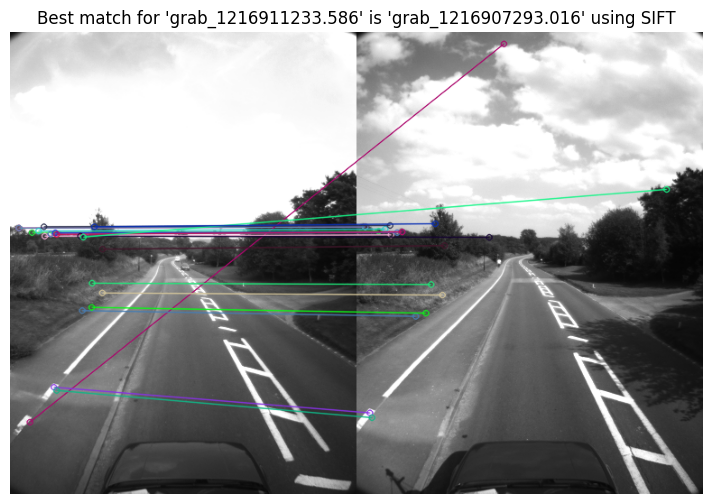

In [14]:
visualize_top_match(data_df, SIFT_baseline_results, index=0, view=0, method="SIFT", ratio_thresh=0.75)

### Single Views

In [15]:
view = 0
sift_acc_0, sift_top5_0 = evaluate_accuracy_single_view(data_df, SIFT_baseline_results, view=view, top_k=5)
sift_acc_0, sift_top10_0 = evaluate_accuracy_single_view(data_df, SIFT_baseline_results, view=view, top_k=10)
print(f"View {view}: Top-1 Accuracy: {sift_acc_0:.3f}, Top-5 Accuracy: {sift_top5_0:.3f}, Top-10 Accuracy: {sift_top10_0:.3f}")

View 0: Top-1 Accuracy: 0.920, Top-5 Accuracy: 0.960, Top-10 Accuracy: 0.960


In [16]:
view = 1
sift_acc_1, sift_top5_1 = evaluate_accuracy_single_view(data_df, SIFT_baseline_results, view=view, top_k=5)
sift_acc_1, sift_top10_1 = evaluate_accuracy_single_view(data_df, SIFT_baseline_results, view=view, top_k=10)
print(f"View {view}: Top-1 Accuracy: {sift_acc_1:.3f}, Top-5 Accuracy: {sift_top5_1:.3f}, Top-10 Accuracy: {sift_top10_1:.3f}")

View 1: Top-1 Accuracy: 0.740, Top-5 Accuracy: 0.880, Top-10 Accuracy: 0.900


In [17]:
view = 2
sift_acc_2, sift_top5_2 = evaluate_accuracy_single_view(data_df, SIFT_baseline_results, view=view, top_k=5)
sift_acc_2, sift_top10_2 = evaluate_accuracy_single_view(data_df, SIFT_baseline_results, view=view, top_k=10)
print(f"View {view}: Top-1 Accuracy: {sift_acc_2:.3f}, Top-5 Accuracy: {sift_top5_2:.3f}, Top-10 Accuracy: {sift_top10_2:.3f}")

View 2: Top-1 Accuracy: 0.860, Top-5 Accuracy: 0.960, Top-10 Accuracy: 0.960


In [18]:
view = 3
sift_acc_3, sift_top5_3 = evaluate_accuracy_single_view(data_df, SIFT_baseline_results, view=view, top_k=5)
sift_acc_3, sift_top10_3 = evaluate_accuracy_single_view(data_df, SIFT_baseline_results, view=view, top_k=10)
print(f"View {view}: Top-1 Accuracy: {sift_acc_3:.3f}, Top-5 Accuracy: {sift_top5_3:.3f}, Top-10 Accuracy: {sift_top10_3:.3f}")

View 3: Top-1 Accuracy: 0.820, Top-5 Accuracy: 0.880, Top-10 Accuracy: 0.920


In [19]:
view = 4
sift_acc_4, sift_top5_4 = evaluate_accuracy_single_view(data_df, SIFT_baseline_results, view=view, top_k=5)
sift_acc_4, sift_top10_4 = evaluate_accuracy_single_view(data_df, SIFT_baseline_results, view=view, top_k=10)
print(f"View {view}: Top-1 Accuracy: {sift_acc_4:.3f}, Top-5 Accuracy: {sift_top5_4:.3f}, Top-10 Accuracy: {sift_top10_4:.3f}")

View 4: Top-1 Accuracy: 0.720, Top-5 Accuracy: 0.800, Top-10 Accuracy: 0.800


### Mean Aggregation

In [20]:
sift_acc_mean, sift_top5_mean = evaluate_accuracy_freq_aggregation(data_df, SIFT_baseline_results, top_k=5)
sift_acc_mean, sift_top10_mean = evaluate_accuracy_freq_aggregation(data_df, SIFT_baseline_results, top_k=10)
print(f"Mean Aggregation: Top-1 Accuracy: {sift_acc_mean:.3f}, Top-5 Accuracy: {sift_top5_mean:.3f}, Top-10 Accuracy: {sift_top10_mean:.3f}")

Mean Aggregation: Top-1 Accuracy: 0.920, Top-5 Accuracy: 0.960, Top-10 Accuracy: 0.960


### Weighted Aggregation

In [21]:
sift_acc_weighted, sift_top5_weighted = evaluate_accuracy_weighted_aggregation(data_df, SIFT_baseline_results, top_k=5)
sift_acc_weighted, sift_top10_weighted = evaluate_accuracy_weighted_aggregation(data_df, SIFT_baseline_results, top_k=10)
print(f"Weighted Aggregation: Top-1 Accuracy: {sift_acc_weighted:.3f}, Top-5 Accuracy: {sift_top5_weighted:.3f}, Top-10 Accuracy: {sift_top10_weighted:.3f}")

Weighted Aggregation: Top-1 Accuracy: 0.920, Top-5 Accuracy: 0.960, Top-10 Accuracy: 0.960
